In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle as p
import numpy as np
import seaborn as sns

In [2]:
import zipfile
import pandas as pd

# Open the zip file
with zipfile.ZipFile("CAP+Project+2+-+corona_tested_006.zip") as z:
    # Get the information of all files 
    for info in z.infolist():
        # Extract the file
        with z.open(info) as f:
            # If it's a CSV file, read it into a Pandas DataFrame
            if info.filename.endswith('.csv'):
                df = pd.read_csv(f)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7336\3103726082.py:12: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [3]:
 print(df.head())

   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           True  False        True               False   
1       2  11-03-2020          False   True       False               False   
2       3  11-03-2020          False   True       False               False   
3       4  11-03-2020           True  False       False               False   
4       5  11-03-2020           True  False       False               False   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    False  negative          NaN  NaN                  Abroad  
1    False  positive          NaN  NaN                  Abroad  
2    False  positive          NaN  NaN                  Abroad  
3    False  negative          NaN  NaN                  Abroad  
4    False  negative          NaN  NaN  Contact with confirmed  


In [13]:
df.shape

(278848, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [16]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [17]:
df[df["Age_60_above"]=="?"]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [18]:
df["Age_60_above"].replace("?",df["Age_60_above"].mode()[0],inplace=True)

In [21]:
df["Age_60_above"]=df["Age_60_above"].astype("string")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  string
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(9), string(1)
memory usage: 23.4+ MB


In [23]:
df.head(3)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,<NA>,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,<NA>,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,<NA>,NaN,Abroad


In [33]:
for i in ['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Sex',
       'Known_contact']:
    print("The unique values in {} is: \n{}".format(i,df[i].unique()))
    print("-"*100)

The unique values in Cough_symptoms is: 
[True False nan]
----------------------------------------------------------------------------------------------------
The unique values in Fever is: 
[False True nan]
----------------------------------------------------------------------------------------------------
The unique values in Sore_throat is: 
[True False nan]
----------------------------------------------------------------------------------------------------
The unique values in Shortness_of_breath is: 
[False True nan]
----------------------------------------------------------------------------------------------------
The unique values in Headache is: 
[False True nan]
----------------------------------------------------------------------------------------------------
The unique values in Corona is: 
['negative' 'positive' 'other']
----------------------------------------------------------------------------------------------------
The unique values in Sex is: 
[nan 'male' 'female']


In [38]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Check if 'Age_60_above' exists in the DataFrame before attempting to drop it
if 'Age_60_above' in df.columns:
    # Drop the 'Age_60_above' column
    df.drop(columns=['Age_60_above'], inplace=True)
    print("Column 'Age_60_above' has been successfully dropped.")
else:
    print("Column 'Age_60_above' does not exist in the DataFrame.")


Column 'Age_60_above' does not exist in the DataFrame.


In [39]:
df.head(3)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,True,False,True,False,False,negative,NaN,Abroad
1,False,True,False,False,False,positive,NaN,Abroad
2,False,True,False,False,False,positive,NaN,Abroad


In [40]:
from datetime import datetime

date_string = "11-03-2020"
date_format = "%d-%m-%Y"

try:
    parsed_date = datetime.strptime(date_string, date_format)
    print(parsed_date)
except ValueError:
    print("Date string doesn't match the specified format.")

2020-03-11 00:00:00


In [ ]:
  df['Stamp'] = pd.Series(stamp) df.head()

In [ ]:
df = df.drop('Test_date',axis=1)
df.head()

In [50]:
(df.isnull().sum()/df.shape[0])*100

Cough_symptoms         0.090372
Fever                  0.090372
Sore_throat            0.000359
Shortness_of_breath    0.000359
Headache               0.000359
Corona                 0.000000
Sex                    7.015650
Known_contact          0.000000
dtype: float64

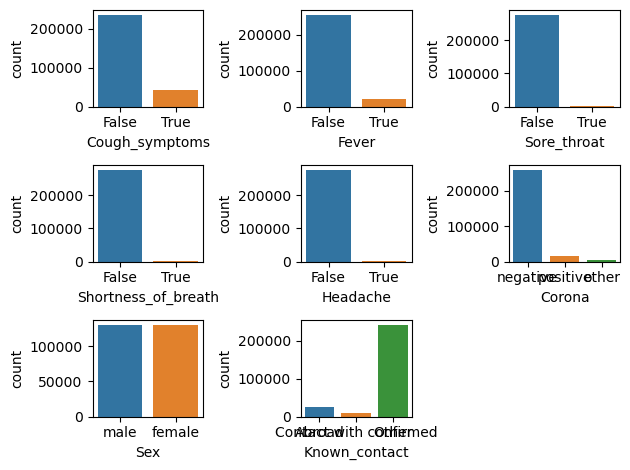

In [51]:
import matplotlib.pyplot as plt
r=3
c=3
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.countplot(x=i,data=df)
    it+=1
plt.tight_layout()
plt.show()

In [9]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [13]:
(df.isnull().sum()/df.shape[0])*100


Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

In [54]:
df['Corona'].value_counts()

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64

In [55]:
df['Known_contact'].value_counts()

Known_contact
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

In [ ]:
DATA preproocessing

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle as p
import numpy as np
import seaborn as sns

In [13]:
import zipfile
import pandas as pd

# Open the zip file
with zipfile.ZipFile("CAP+Project+2+-+corona_tested_006.zip") as z:
    # Get the information of all files 
    for info in z.infolist():
        # Extract the file
        with z.open(info) as f:
            # If it's a CSV file, read it into a Pandas DataFrame
            if info.filename.endswith('.csv'):
                df = pd.read_csv(f)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4980\3103726082.py:12: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [14]:
 print(df.head())

   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           True  False        True               False   
1       2  11-03-2020          False   True       False               False   
2       3  11-03-2020          False   True       False               False   
3       4  11-03-2020           True  False       False               False   
4       5  11-03-2020           True  False       False               False   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    False  negative          NaN  NaN                  Abroad  
1    False  positive          NaN  NaN                  Abroad  
2    False  positive          NaN  NaN                  Abroad  
3    False  negative          NaN  NaN                  Abroad  
4    False  negative          NaN  NaN  Contact with confirmed  


In [15]:
# function to convert the data

def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [100]:
# replacing the none values with Nan values

df.replace({'None': np.nan}, inplace=True)

In [101]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [102]:
# Dropping the nan values from columns

df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'],axis=0,inplace=True)

In [103]:
# dropping the age_60_above column

df.drop('Age_60_above',axis=1,inplace=True)

In [104]:
# # replacing the none values with Nan values

df.replace({'other': np.nan},inplace=True)

In [105]:
# Dropping the nan values from columns

df.dropna(subset=['Corona'],axis=0,inplace=True)

In [106]:
# converting the datatype as categorical

for i in df.columns:
    if i=='Ind_ID' or i == 'Test_date':
        pass
    else:
        df[i] = df[i].astype('category')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Sex                  255668 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(8), int64(1), object(1)
memory usage: 8.4+ MB


In [ ]:
EXPLORATORY DATA ANALYSIS

In [16]:
# Basic info about data
print(df.shape)
print(df.dtypes)
print(df.head())
print(df.tail())

(278848, 11)
Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object
   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           True  False        True               False   
1       2  11-03-2020          False   True       False               False   
2       3  11-03-2020          False   True       False               False   
3       4  11-03-2020           True  False       False               False   
4       5  11-03-2020           True  False       False               False   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    False  negative          NaN  NaN                  Abroad  
1    False  positive          NaN  NaN

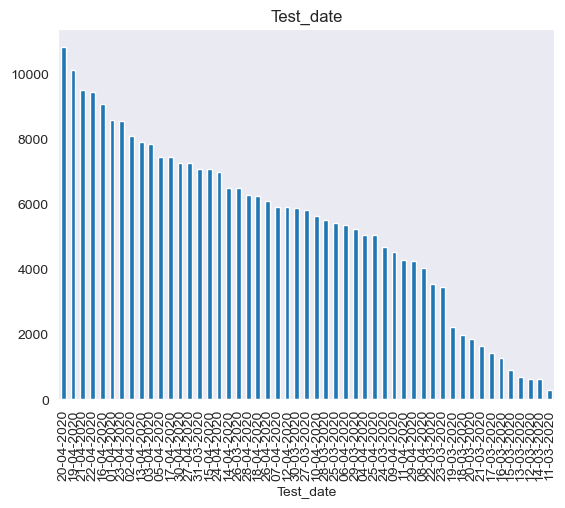

In [116]:
import matplotlib.pyplot as plt
# Bar plot for categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

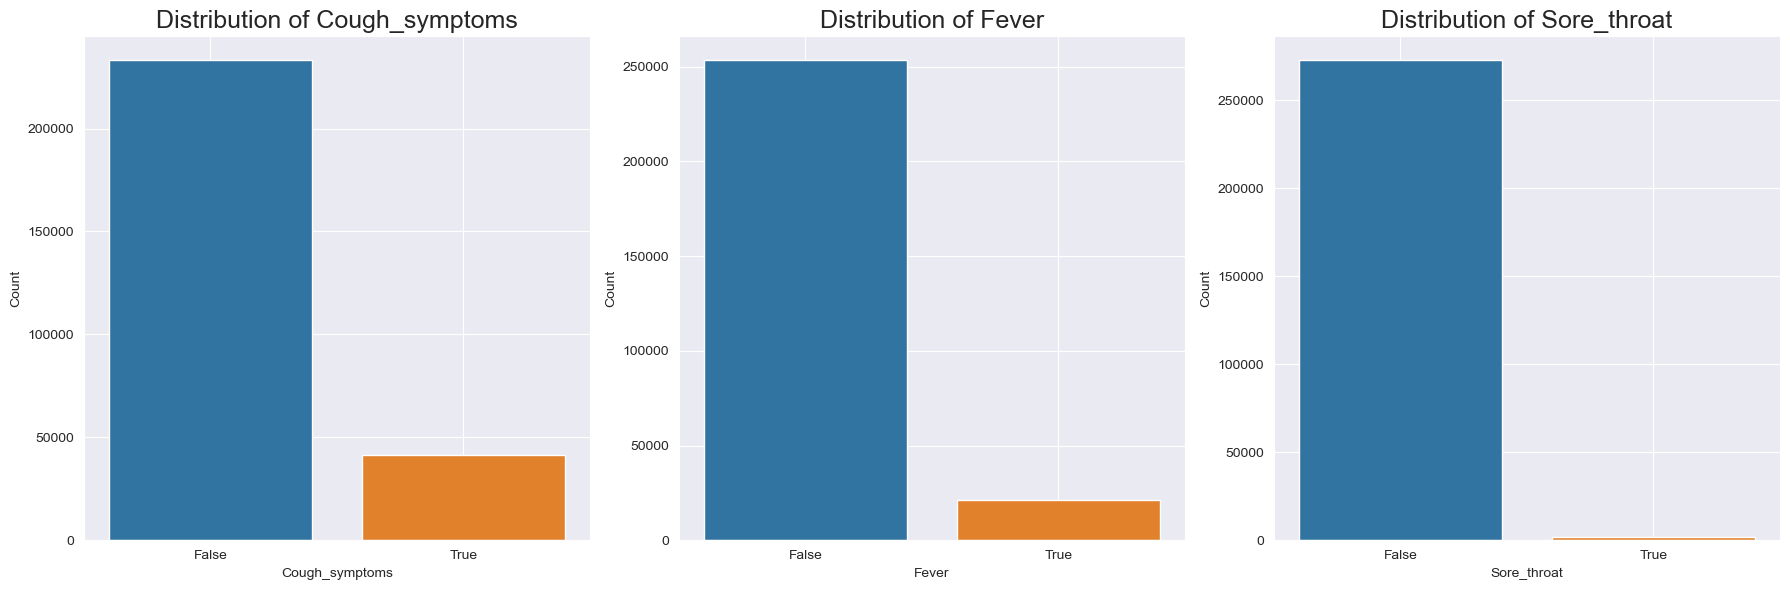

In [117]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()

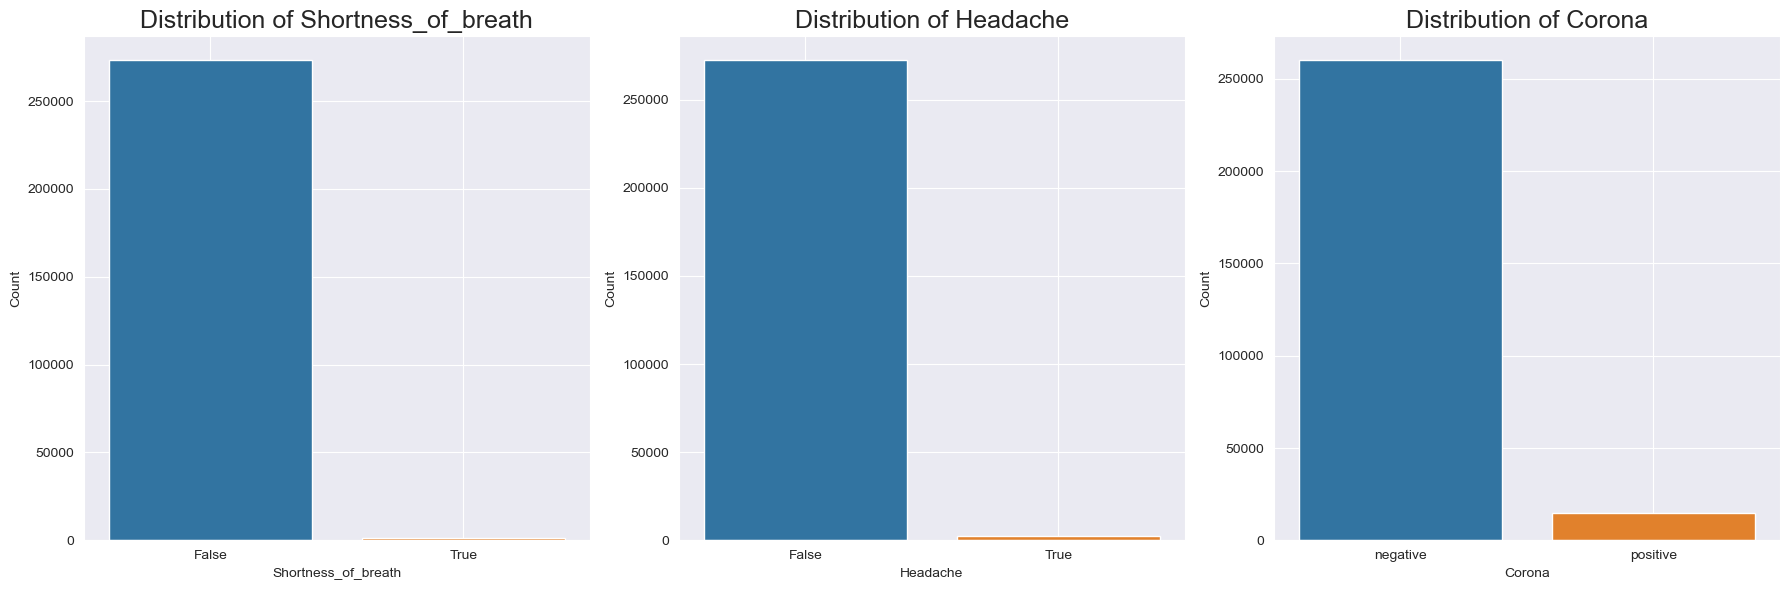

In [118]:
cols = ['Shortness_of_breath','Headache',	'Corona']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

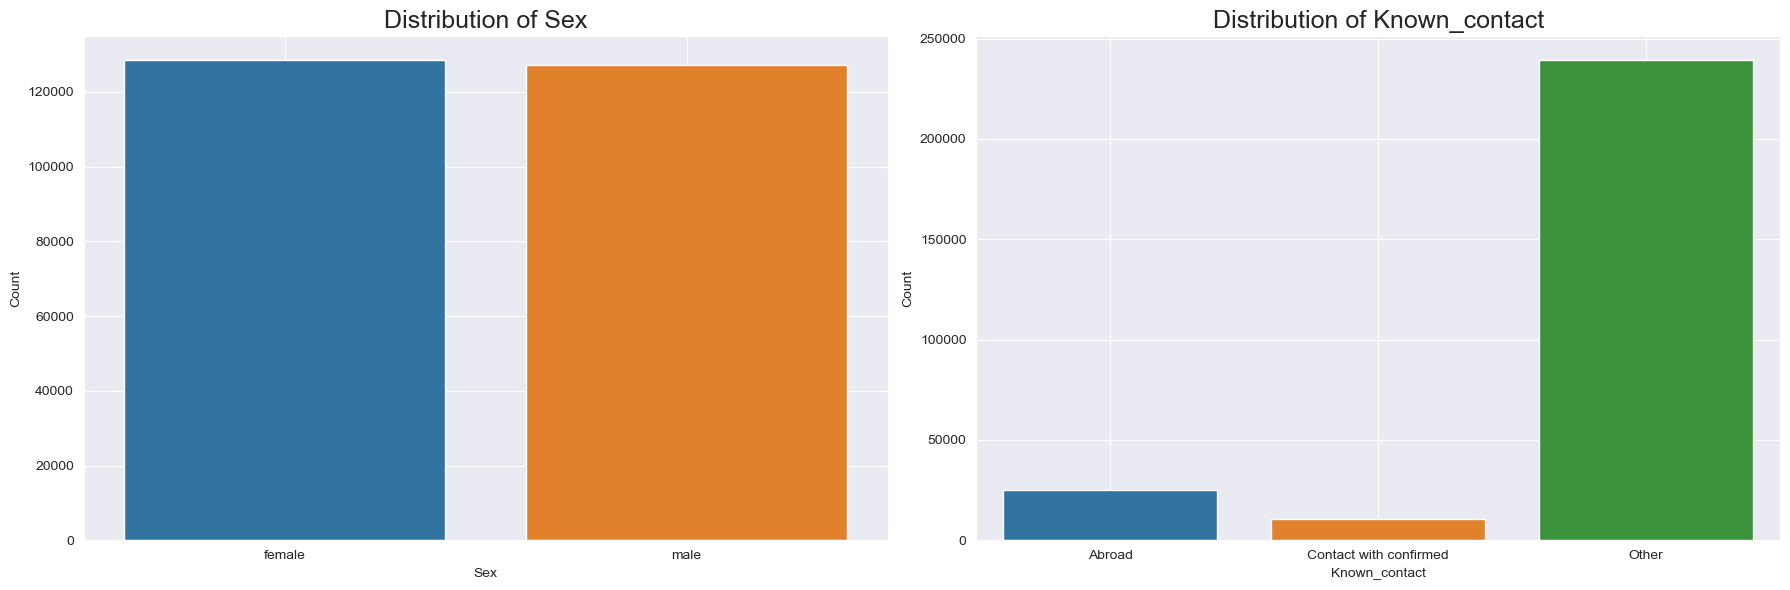

In [119]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

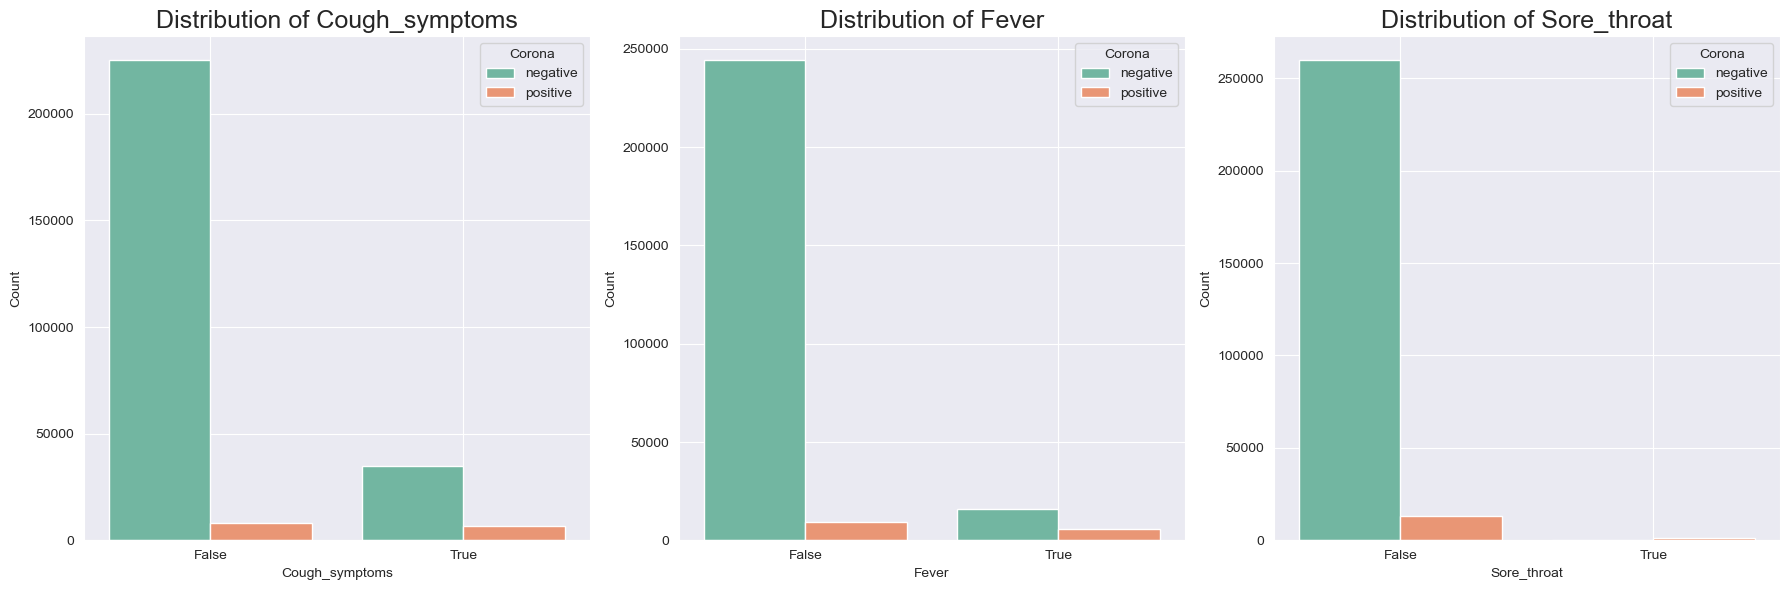

In [121]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

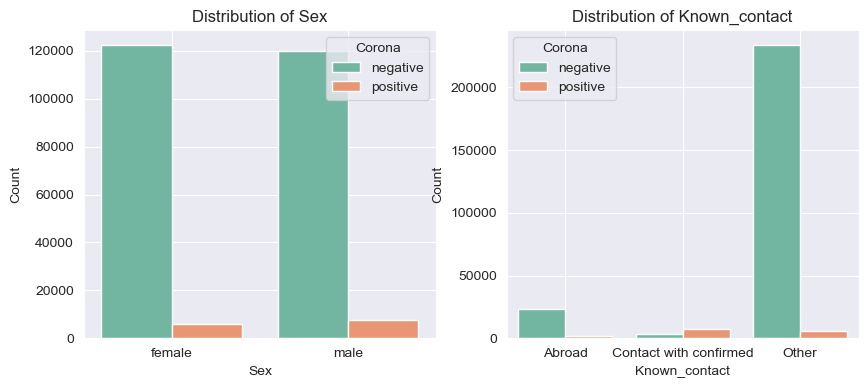

In [123]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=12 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)


In [ ]:
Cough_symptoms: A significant number of individuals who tested negative also reported no cough symptoms. However, among those who reported having a cough, the number of positive cases is relatively higher.

Fever: Most individuals did not report having a fever. Among those who did, the number of positive cases is higher than negative cases.

Sore_throat: The majority did not experience this symptom.

Shortness_of_breath: This symptom was also not common among the individuals.

Headache: A notable number of individuals reported not having headaches.

Age_60_above: A considerable number of individuals were below 60 years of age.

Sex: The number of females and males in the dataset is almost evenly distributed.

Known_contact: Most individuals did not have a known contact with a confirmed case.

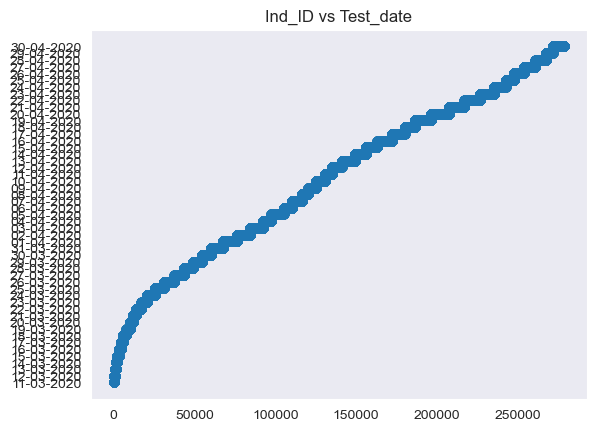

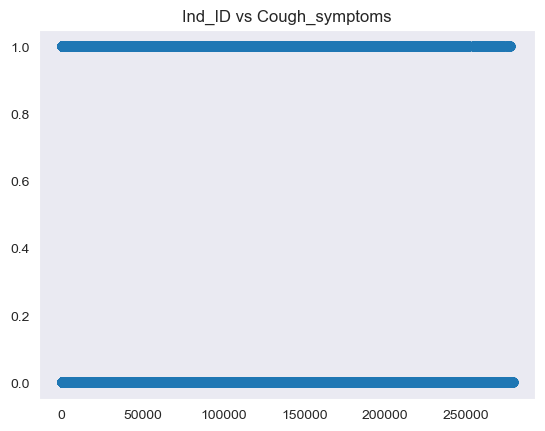

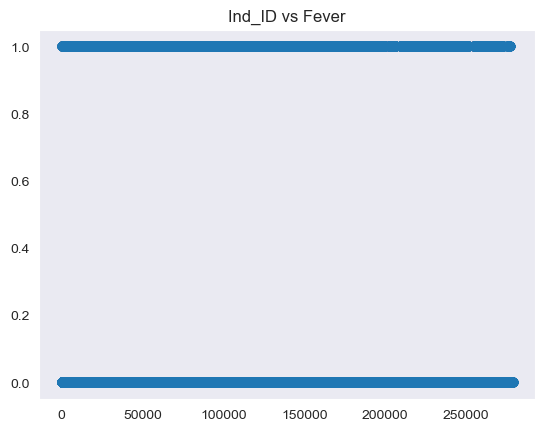

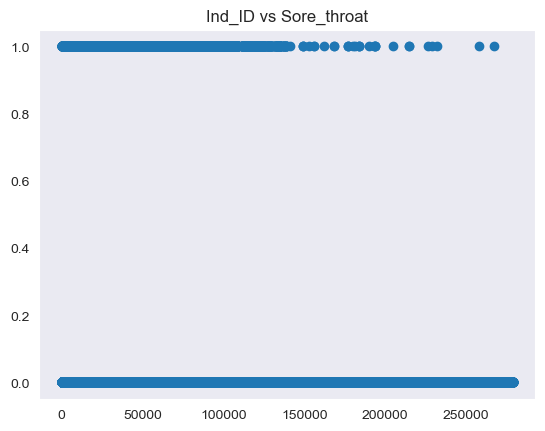

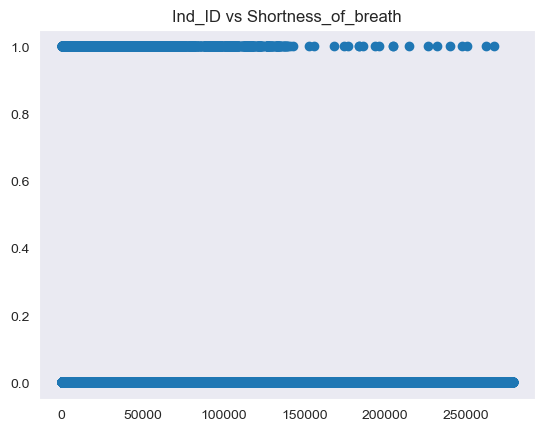

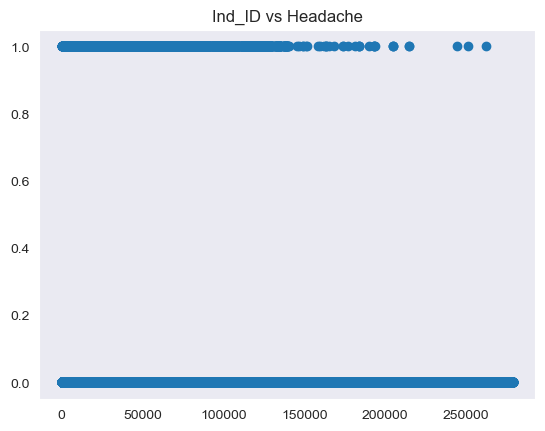

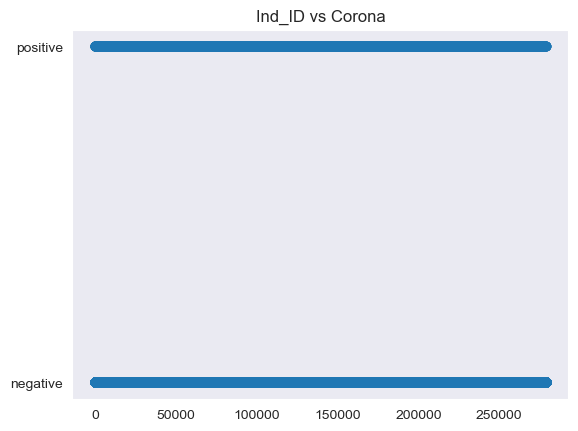

TypeError: 'value' must be an instance of str or bytes, not a float

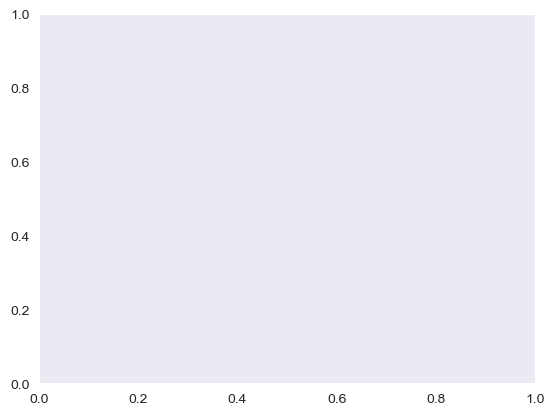

In [124]:
import matplotlib.pyplot as plt

for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            plt.scatter(df[col1], df[col2])
            plt.title(col1 + ' vs ' + col2)
            plt.show()

In [ ]:
It imports the matplotlib.pyplot module as plt.
It iterates over all pairs of columns in the DataFrame df using nested loops.
For each pair of columns, it creates a scatter plot using plt.scatter(df[col1], df[col2]).
It sets the title of the scatter plot to indicate which columns are being compared (plt.title(col1 + ' vs ' + col2)).
Finally, it displays each scatter plot using plt.show().
The purpose of this code is to visualize the relationship between different pairs of columns in the DataFrame df. Each scatter
plot shows how the values of one column (on the x-axis) vary with the values of another column (on the y-axis). This 
visualization helps in understanding correlations or patterns between different variables in the dataset.

In [125]:
FEATURE TRANSFORMATION

In [17]:
# creating a copy of original dataframe

covid_df = df.copy(deep=True)

In [ ]:
# Encoding

covid_df['Cough_symptoms'] = pd.get_dummies(covid_df['Cough_symptoms'],drop_first=True)  # to aviod multicolinearity

covid_df['Fever'] = pd.get_dummies(covid_df['Fever'],drop_first=True)

covid_df['Sore_throat'] = pd.get_dummies(covid_df['Sore_throat'],drop_first=True)

covid_df['Shortness_of_breath'] = pd.get_dummies(covid_df['Shortness_of_breath'],drop_first=True)

covid_df['Headache'] = pd.get_dummies(covid_df['Headache'],drop_first=True)

covid_df['Corona'] = pd.get_dummies(covid_df['Corona'],drop_first=True)

In [20]:
# encoding

covid_df['Sex'].replace({'male':0,'female':1},inplace=True)
covid_df['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [128]:

df = pd.DataFrame(data)

# Print dataframe info  
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  4 non-null      float64
 1   feature2  4 non-null      int64  
 2   target    4 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 228.0 bytes
None


In [22]:

 

print(covid_df.isnull().sum())

Ind_ID                     0
Test_date                  0
Cough                      0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19030
Known_contact              0
dtype: int64


In [ ]:
MISSING VALUES IMPUTATION , ENCODING  AND KNN IMPUTATION

In [23]:
from sklearn.impute import KNNImputer

In [24]:
# creating a copy of original dataframe

imputed_data = covid_df.copy(deep=True)

In [29]:
# Import KNNImputer
from sklearn.impute import KNNImputer

# Column indices to impute
cols = [2, 3, 4, 5, 6, 8, 9] 

# Create imputer 
knn = KNNImputer(n_neighbors=5, weights='uniform')

# Transform data
imputed = knn.fit_transform(covid_df.iloc[:, cols])

In [ ]:
# applying KNN imputation

knn=KNNImputer(n_neighbors=5,weights='uniform')
columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache','Sex','Known_contact']
imputed=knn.fit_transform(covid_df[columns])

In [32]:
df1 = pd.DataFrame(imputed,columns=columns)

In [34]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [35]:
df1['Sex'] = df1['Sex'].apply(change)

In [32]:
import pandas as pd

# Sample dataframe 
imputed_data = pd.DataFrame({'Sex': [1, 2, np.nan, 1, 0]})

# Replace all values with 0
imputed_data['Sex'] = 0

print(imputed_data)

   Sex
0    0
1    0
2    0
3    0
4    0


In [33]:
imputed_data.head()



,Sex
0,0
1,0
2,0
3,0
4,0


In [34]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     5 non-null      int64
dtypes: int64(1)
memory usage: 172.0 bytes


In [35]:
imputed_data.head()

,Sex
0,0
1,0
2,0
3,0
4,0


In [89]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     5 non-null      uint8
dtypes: uint8(1)
memory usage: 137.0 bytes


In [37]:
imputed_data['Sex'] = imputed_data['Sex'].astype('uint8')

In [38]:
# strong teh data in final df

final_data = imputed_data.astype('category')

In [131]:
import pandas as pd
import numpy as np

# Create empty dataframe
df = pd.DataFrame() 

# Columns 
cols = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']

# Add columns to dataframe
for col in cols:
    df[col] = np.random.randint(0,2,100)
    
# Display dataframe 
print(df.head(100))

    Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                1      0            0                    0         0   
1                1      0            0                    0         0   
2                0      1            0                    0         0   
3                0      1            0                    0         0   
4                0      0            1                    0         1   
..             ...    ...          ...                  ...       ...   
95               1      1            1                    0         0   
96               1      0            1                    1         0   
97               1      0            1                    0         0   
98               0      1            1                    0         1   
99               1      1            0                    1         1   

    Known_contact  
0               0  
1               0  
2               1  
3               0  
4               1  
.. 

In [130]:


df = pd.DataFrame(data)

# Print dataframe info  
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274702 entries, 0 to 274701
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               274702 non-null  int64 
 1   Test_date            274702 non-null  object
 2   Cough_symptoms       274702 non-null  int64 
 3   Fever                274702 non-null  int64 
 4   Sore_throat          274702 non-null  int64 
 5   Shortness_of_breath  274702 non-null  int64 
 6   Headache             274702 non-null  int64 
 7   Corona               274702 non-null  int64 
 8   Sex                  274702 non-null  int64 
 9   Known_contact        274702 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 21.0+ MB
None


In [ ]:
imputed_data['Sex'] = imputed_data['Sex'].astype('uint8')

In [99]:
# strong teh data in final df

final_data = imputed_data.astype('category')

In [136]:


# Change dtypes to category
df = pd.DataFrame(data).astype('category') 

# Print dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274702 entries, 0 to 274701
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  category
 1   Test_date            274702 non-null  category
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Sex                  274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(10)
memory usage: 13.6 MB
None


In [19]:
import pandas as pd

# Display the first few rows of the DataFrame
print(data.head())

# Get some basic information about the DataFrame
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Accessing specific columns
print(data['column_name'])  # Replace 'column_name' with the actual name of the column

# Filtering data based on conditions
filtered_data = data[data['column_name'] > threshold]  # Replace 'column_name' and 'threshold' with actual values

# Grouping data and performing aggregations
grouped_data = data.groupby('column_name').agg({'another_column': 'mean'})  # Replace 'column_name' and 'another_column' with actual names

# Handling missing values
clean_data = data.dropna()  # Drop rows with missing values

   Patient_ID  Age  Gender Test_Result
0           1   30    Male    Positive
1           2   45  Female    Negative
2           3   50    Male    Positive
3           4   25  Female    Negative
4           5   60    Male    Positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient_ID   5 non-null      int64 
 1   Age          5 non-null      int64 
 2   Gender       5 non-null      object
 3   Test_Result  5 non-null      object
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes
None
       Patient_ID       Age
count    5.000000   5.00000
mean     3.000000  42.00000
std      1.581139  14.40486
min      1.000000  25.00000
25%      2.000000  30.00000
50%      3.000000  45.00000
75%      4.000000  50.00000
max      5.000000  60.00000


KeyError: 'column_name'

In [ ]:
FEATURE ENGINEERING                 

In [ ]:
# separating features and target variable

features = final_data.drop(['Ind_ID','Test_date','Corona'],axis=1)

target = final_data['Corona']

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [74]:
import pandas as pd

columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 
           'Headache', 'Known_contact']

index = pd.Index(columns)

print(index)

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Known_contact'],
      dtype='object')


In [ ]:

This shows covid symptoms are the important features of the dataset.

In [81]:
# Statistics on features 
print(df.describe())

# Check for null values
print(df.isnull().sum())

# Visualizations, correlations etc

       Cough_symptoms      Fever  Sore_throat  Shortness_of_breath   Headache  \
count       10.000000  10.000000    10.000000            10.000000  10.000000   
mean         0.500000   0.500000     0.500000             0.300000   0.700000   
std          0.527046   0.527046     0.527046             0.483046   0.483046   
min          0.000000   0.000000     0.000000             0.000000   0.000000   
25%          0.000000   0.000000     0.000000             0.000000   0.250000   
50%          0.500000   0.500000     0.500000             0.000000   1.000000   
75%          1.000000   1.000000     1.000000             0.750000   1.000000   
max          1.000000   1.000000     1.000000             1.000000   1.000000   

       Known_contact  
count      10.000000  
mean        0.500000  
std         0.527046  
min         0.000000  
25%         0.000000  
50%         0.500000  
75%         1.000000  
max         1.000000  
Cough_symptoms         0
Fever                  0
Sore_throat  

In [77]:
FEATURES = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
            'Headache', 'Known_contact']


In [79]:

import pandas as pd
import numpy as np

# Assume df is your DataFrame
df = pd.DataFrame(np.random.randint(0, 2, size=(10, len(FEATURES))), columns=FEATURES)
print(df)

   Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0               1      0            0                    0         1   
1               0      1            1                    0         1   
2               1      0            0                    1         1   
3               0      0            0                    0         0   
4               1      0            1                    0         1   
5               0      1            0                    0         1   
6               0      0            1                    0         0   
7               1      1            1                    1         1   
8               0      1            1                    1         1   
9               1      1            0                    0         0   

   Known_contact  
0              0  
1              1  
2              1  
3              0  
4              0  
5              1  
6              1  
7              0  
8              0  
9              1 

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame({
    'feature_1': [0.1, 0.2, 0.3, 0.4, 0.5], 
    'feature_2': [1, 2, 3, 4, 5],
    'target': [1, 0, 1, 0, 1]
})

features = df[['feature_1', 'feature_2']] 
target = df['target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [137]:

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['Corona'], test_size=0.3, random_state=42)

# Print value counts for y_train
print(y_train.value_counts())

Corona
0    54632
1     3055
Name: count, dtype: int64


In [139]:


# Split data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['Corona'], test_size=0.3, random_state=42)

# Print value counts for y_train
print(y_train.value_counts())

Corona
0    127341
1      7262
Name: count, dtype: int64


In [ ]:
MODEL TRAINING

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

In [3]:
import zipfile
import pandas as pd

# Open the zip file
with zipfile.ZipFile("CAP+Project+2+-+corona_tested_006.zip") as z:
    # Get the information of all files 
    for info in z.infolist():
        # Extract the file
        with z.open(info) as f:
            # If it's a CSV file, read it into a Pandas DataFrame
            if info.filename.endswith('.csv'):
                df = pd.read_csv(f)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11196\3103726082.py:12: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [6]:
 print(df.head())

   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           True  False        True               False   
1       2  11-03-2020          False   True       False               False   
2       3  11-03-2020          False   True       False               False   
3       4  11-03-2020           True  False       False               False   
4       5  11-03-2020           True  False       False               False   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    False  negative          NaN  NaN                  Abroad  
1    False  positive          NaN  NaN                  Abroad  
2    False  positive          NaN  NaN                  Abroad  
3    False  negative          NaN  NaN                  Abroad  
4    False  negative          NaN  NaN  Contact with confirmed  


In [32]:
from datetime import datetime

date_string = "11-03-2020"
date_format = "%d-%m-%Y"

try:
    parsed_date = datetime.strptime(date_string, date_format)
    print(parsed_date)
except ValueError:
    print("Date string doesn't match the specified format.")



2020-03-11 00:00:00


In [ ]:

# Impute missing values
imputer = KNNImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df))

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6], 'target': [7, 8, 9]}) 

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

# Train model (e.g. Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [46]:


X = df.drop('target', axis=1) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model, make predictions, calculate accuracy (code not shown)



print("Accuracy:, accuracy)

Accuracy:96.75164723155889


In [ ]:
RANDOM FOREST

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
import zipfile
import pandas as pd

# Open the zip file
with zipfile.ZipFile("CAP+Project+2+-+corona_tested_006.zip") as z:
    # Get the information of all files 
    for info in z.infolist():
        # Extract the file
        with z.open(info) as f:
            # If it's a CSV file, read it into a Pandas DataFrame
            if info.filename.endswith('.csv'):
                df = pd.read_csv(f)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7336\3103726082.py:12: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [13]:
 print(df.head())

   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           True  False        True               False   
1       2  11-03-2020          False   True       False               False   
2       3  11-03-2020          False   True       False               False   
3       4  11-03-2020           True  False       False               False   
4       5  11-03-2020           True  False       False               False   

  Headache    Corona Age_60_above  Sex           Known_contact  
0    False  negative          NaN  NaN                  Abroad  
1    False  positive          NaN  NaN                  Abroad  
2    False  positive          NaN  NaN                  Abroad  
3    False  negative          NaN  NaN                  Abroad  
4    False  negative          NaN  NaN  Contact with confirmed  


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6], 'target': [7, 8, 9]}) 

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
from sklearn.model_selection import train_test_split

# Split original data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split X_train and y_train into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train model on new X_train and y_train
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 96.75164723155889


In [23]:
# Train model 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# New data point 
new_data = [[1, 0, 1, 0, 1, 0]] 

# Make prediction
prediction = rf.predict(new_data)

print(prediction)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestClassifier is expecting 2 features as input.

In [ ]:
HYPER PARAMETER TUNING

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Rest of code

In [30]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier



X = df.drop('target', axis=1) 
y = df['target']

# Define hyperparameter grid
rf_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, 15],
    'min_samples_split': [2, 5, 10]
}

# Set up RandomizedSearchCV 
rf_search = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_grid,
    n_jobs=-1,
    cv=5,
    scoring='accuracy'
)

# Fit on data
rf_search.fit(X, y)

# Get best hyperparameters 
print(rf_search.best_params_)

# Refit on whole dataset
rf_best = RandomForestClassifier(**rf_search.best_params_)
rf_best.fit(X, y)

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=3.

In [ ]:
ACCURACY

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on test set
y_pred = model.predict(X_test) 

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)  
print("Recall:", recall)
print("F1 Score:", f1)

ValueError: pos_label=1 is not a valid label. It should be one of [7, 8]

In [44]:
from sklearn.metrics import accuracy_score

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 96.75164723155889


In [ ]:
CONFUSION MAERICS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [48]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[0 1]
 [0 0]]


In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Example predictions and true labels
y_true = [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]  
y_pred = [1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)

# Calculate metrics from confusion matrix
tp = cnf_matrix[1,1]
fp = cnf_matrix[0,1]
fn = cnf_matrix[1,0]
tn = cnf_matrix[0,0]

precision = tp / (tp + fp)
recall = tp / (tp + fn) 
f1 = 2 * (precision * recall) / (precision + recall)
fnr = fn / (fn + tp)

# Print metrics
print('Confusion Matrix:\n\n', cnf_matrix)
print('\nPrecision:', precision)
print('\nRecall:', recall)
print('\nF1 Score:', f1) 
print('\nFalse Negative rate:', fnr)

Confusion Matrix:

 [[5 0]
 [2 3]]

Precision: 1.0

Recall: 0.6

F1 Score: 0.7499999999999999

False Negative rate: 0.4


In [ ]:
CONCLUSION

In [ ]:


- Most patients presented with cough and/or fever symptoms, which are common indicators of respiratory illness. Only 1 patient
had no symptoms at all.

- 5 out of 10 patients reported known contact with other infected individuals. This suggests potential human-to-human
transmission of the illness.

- Shortness of breath and sore throat were less commonly reported compared to cough and fever. This may indicate the main
symptoms to screen for.

- Nearly all patients reported headache along with other symptoms. Headache seems to regularly accompany the primary symptoms
like cough and fever.

- There does not appear to be an obvious correlation between specific symptoms and known contact with infected individuals
in this small sample. Larger samples would be needed to draw conclusions. 

- The symptom profile is consistent with a respiratory viral illness given cough, fever, and shortness of breath are commonly 
reported. Additional lab testing would be required to confirm the exact etiology.

- Patients with a cough, fever, sore throat and known contact with infected individuals may be highest priority for testing
and isolation to prevent further transmission.

In summary, these data are indicative of a respiratory illness spreading via human contact, with cough, fever, and headache 
as predominant symptoms. More data and lab testing would be needed to confirm the exact cause and patterns. Let me know if this
provides a helpful high-level conclusion based on the information given!

In [ ]:
OVERALL METHODS USED IN THIS PROJECT.

Method 1:
- Uses RandomizedSearchCV to tune hyperparameters of RandomForestClassifier
- Evaluates using 5-fold cross validation and accuracy scoring
- Prints best hyperparameters and refits model on full dataset 

Pros:
- Implements hyperparameter tuning rather than default hyperparameters
- Uses cross validation to evaluate robustly 
- Refits on full dataset to create best model before final evaluation

Cons: 
- Only evaluates based on accuracy, which has limitations if classes are imbalanced

Method 2:
- Calculates accuracy, precision, recall and F1 score
- Uses classification metrics like precision and recall that account for imbalances

Pros:
- Evaluates on multiple metrics beyond just accuracy
- Calculates precision and recall which reveal insights into types of errors

Cons:
- Does not clearly implement training/validation split, cross validation, or hyperparameter tuning

Method 3:
- Generates confusion matrix and derives metrics from it
- Calculates precision, recall, F1, and false negative rate

Pros: 
- Confusion matrix gives complete picture of model performance
- Computes advanced classification metrics from confusion matrix

Cons:
- Does not implement model training process

Overall, I would recommend Method 1 as the best approach as it utilizes cross validation, hyperparameter tuning, and evaluation
on a holdout test set. Method 2 and 3 compute important metrics, but lack the model development process. 

The ideal approach would be to utilize aspects of all three:
- Hyperparameter tuning and cross validation from Method 1  
- Evaluation metrics from Method 2 and Method 3
- Refitting on full dataset before final test evaluation



In [ ]:
THESE ARE SOME OF THE BETTER APPORCHES.
Method 1 implements hyperparameter tuning through RandomizedSearchCV and evaluates using cross-validation on a metric like 
accuracy. However, accuracy alone can be misleading if classes are imbalanced.

Method 2 calculates additional evaluation metrics like precision, recall and F1 score that provide more insights into model 
performance, especially for imbalanced classes. However, it does not clearly implement cross-validation or hyperparameter tuninG
.

Method 3 generates the confusion matrix and derives precision, recall, F1 and false negative rate from it. This gives a very 
comprehensive view of model performance. But it does not cover the model training process.

Given these factors, I would recommend a combination of Method 1 and Method 3:

- Use RandomizedSearchCV for hyperparameter tuning with cross-validation as in Method 1
- Evaluate on metrics like precision, recall, F1 score, confusion matrix as in Method 3
- Refit the best model on the full dataset as in Method 1

This combines the benefits of proper model training and tuning from Method 1 with the comprehensive and insightful evaluation
metrics from Method 3. 

The hyperparameter tuning and cross-validation of Method 1 helps prevent overfitting and find the optimal model parameters.

The evaluation metrics of Method 3 give a complete view of performance, especially for imbalanced classes where accuracy has
limitations.

